In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc #didnt need
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime
from cartopy.feature.nightshade import Nightshade
import seaborn as sns

from matplotlib.pyplot import figure
from scipy import stats

In [141]:
from sklearn.linear_model import LinearRegression

In [86]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [87]:
plt.rcParams.update({'font.size': 15})

In [88]:
sorg =pd.read_csv(r"C:\Users\augus\OneDrive\Documents\School\Sorghum\hidalgo_Sorg_Acre_fixed.csv")

In [89]:
hidalg_temp2002= pd.read_excel(r"C:\Users\augus\OneDrive\Documents\School\Sorghum\Hidalgo2002Temp.xlsx")
hidalg_temp2007= pd.read_excel(r"C:\Users\augus\OneDrive\Documents\School\Sorghum\Hidalgo2007Temp.xlsx")
hidalg_temp2012= pd.read_excel(r"C:\Users\augus\OneDrive\Documents\School\Sorghum\Hidalgo2012Temp.xlsx")
hidalg_temp2017= pd.read_excel(r"C:\Users\augus\OneDrive\Documents\School\Sorghum\Hidalgo2017Temp.xlsx")

In [90]:
hidalg_temp2002["DATE"]= pd.date_range(start = '01/01/2002', end = '12/31/2002', freq='D')
hidalg_temp2007["DATE"]= pd.date_range(start = '01/01/2007', end = '12/31/2007', freq='D')
hidalg_temp2012["DATE"]= pd.date_range(start = '01/01/2012', end = '12/31/2012', freq='D')
hidalg_temp2017["DATE"]= pd.date_range(start = '01/01/2017', end = '12/31/2017', freq='D')

In [91]:
hidalg_temp2007["average_temp"]= hidalg_temp2007["Unnamed: 2"]
hidalg_temp2012["average_temp"]= hidalg_temp2012["Unnamed: 2"]
hidalg_temp2017["average_temp"]= hidalg_temp2017["Unnamed: 2"]

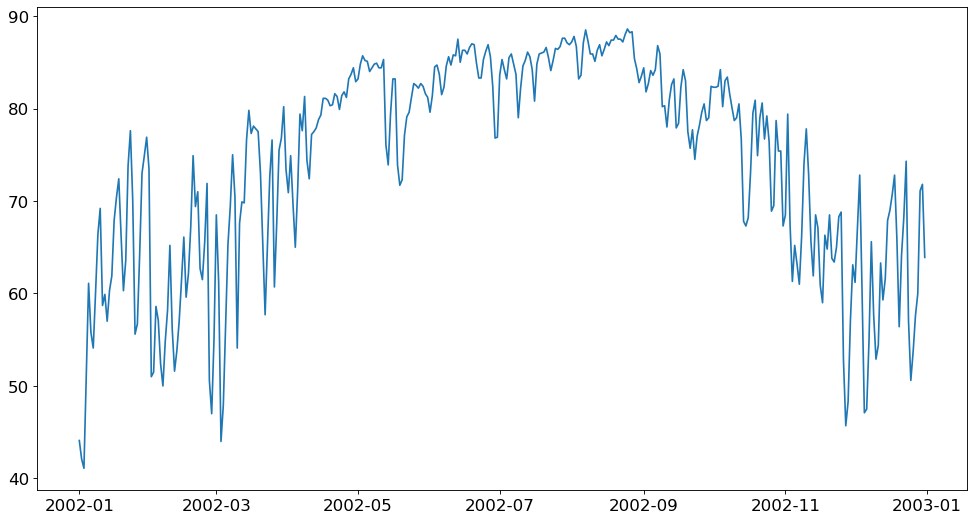

In [92]:
figure(figsize=(15, 8), dpi=80)
plt.plot(hidalg_temp2002['DATE'], hidalg_temp2002['average_temp'], label="2002")

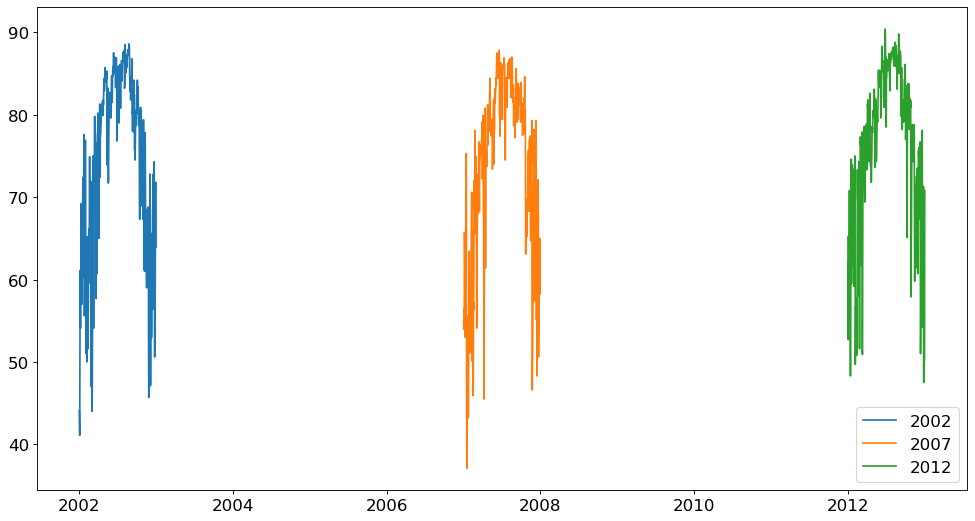

In [93]:
figure(figsize=(15, 8), dpi=80)
plt.plot(hidalg_temp2002['DATE'], hidalg_temp2002['average_temp'], label="2002")
plt.plot(hidalg_temp2007['DATE'], hidalg_temp2007['Unnamed: 2'], label="2007")
plt.plot(hidalg_temp2012['DATE'], hidalg_temp2012['Unnamed: 2'], label="2012")

plt.legend()

In [94]:
sorg

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2002,YEAR,NaN,COUNTY,TEXAS,48,LOWER VALLEY,97,HIDALGO,...,NaN,NaN,0,NaN,SORGHUM,"SORGHUM, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"110,761",11.7
1,CENSUS,2007,YEAR,NaN,COUNTY,TEXAS,48,LOWER VALLEY,97,HIDALGO,...,NaN,NaN,0,NaN,SORGHUM,"SORGHUM, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"169,633",NaN
2,CENSUS,2012,YEAR,NaN,COUNTY,TEXAS,48,LOWER VALLEY,97,HIDALGO,...,NaN,NaN,0,NaN,SORGHUM,"SORGHUM, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"170,770",NaN
3,CENSUS,2017,YEAR,NaN,COUNTY,TEXAS,48,LOWER VALLEY,97,HIDALGO,...,NaN,NaN,0,NaN,SORGHUM,"SORGHUM, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"84,012",NaN


In [95]:
j=365
i=0
HIDTEMPAVG_2002= []
for x in range(1):
    MC_average= (sum(hidalg_temp2002.average_temp[i:j]))/365
    HIDTEMPAVG_2002.append(MC_average)
    i=j
    j= j+365
    
HIDTEMP_AVG2002= np.array(HIDTEMPAVG_2002)


In [96]:
j=365
i=0
HIDTEMPAVG_2007= []
for x in range(1):
    MC_average= (sum(hidalg_temp2007.average_temp[i:j]))/365
    HIDTEMPAVG_2007.append(MC_average)
    i=j
    j= j+365
    
HIDTEMP_AVG2007= np.array(HIDTEMPAVG_2007)

In [97]:
j=365
i=0
HIDTEMPAVG_2012= []
for x in range(1):
    MC_average= (sum(hidalg_temp2012.average_temp[i:j]))/365
    HIDTEMPAVG_2012.append(MC_average)
    i=j
    j= j+365
    
HIDTEMP_AVG2012= np.array(HIDTEMPAVG_2012)

In [98]:
j=365
i=0
HIDTEMPAVG_2017= []
for x in range(1):
    MC_average= (sum(hidalg_temp2017.average_temp[i:j]))/365
    HIDTEMPAVG_2017.append(MC_average)
    i=j
    j= j+365
    
HIDTEMP_AVG2017= np.array(HIDTEMPAVG_2017)

In [99]:
hid2002 = pd.DataFrame(HIDTEMP_AVG2002, columns = ['temp'])
hid2007 = pd.DataFrame(HIDTEMP_AVG2007, columns = ['temp'])
hid2012 = pd.DataFrame(HIDTEMP_AVG2012, columns = ['temp'])
hid2017 = pd.DataFrame(HIDTEMP_AVG2017, columns = ['temp'])

In [100]:
yearlytemp= pd.concat([hid2002,hid2007,hid2017,hid2017])

In [101]:
two= np.array([2002,2007,2012,2017])

In [102]:
yearlytemp['year']= two

In [103]:
yearlytemp

,temp,year
0,74.332055,2002
0,73.850137,2007
0,76.338904,2012
0,76.338904,2017


In [104]:
#labels= list(['2002','2003','2004','2005','2006','2007','2008','2009','2010','20011','2012','2013','2014','2015','2016','2017'])

labels= list(['2002','2007','2012','2017'])

In [105]:
#labels= pd.date_range(start = '01/01/2002', end = '12/31/2017', freq='y')

([<matplotlib.axis.XTick at 0x1ade59f6d90>,
 [Text(2002, 0, '2002'),
  Text(2007, 0, '2007'),
  Text(2012, 0, '2012'),
  Text(2017, 0, '2017')])

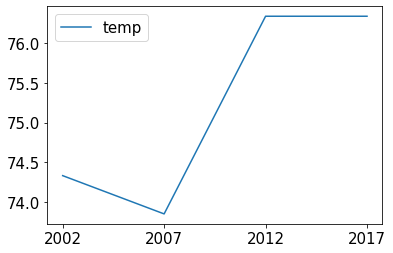

In [126]:
plt.plot(yearlytemp['year'],yearlytemp['temp'], label='temp')
#plt.plot(sorg.Year[0:], sorg.Value[0:], label= 'sorg')
plt.legend()
plt.xticks(yearlytemp['year'],labels)

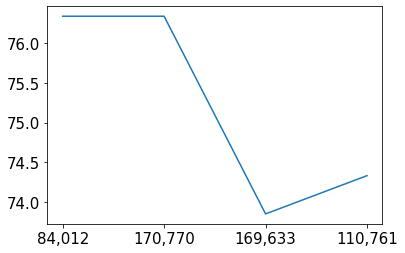

In [118]:
plt.plot(sorg.Value, yearlytemp['temp'])
plt.gca().invert_xaxis()

In [195]:
plt.rcParams.update({'font.size': 18})

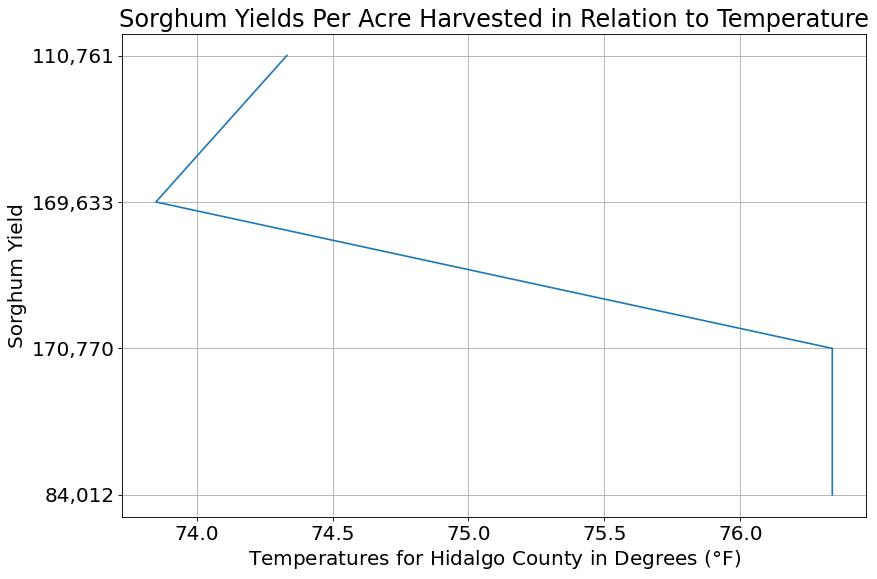

In [196]:
figure(figsize=(12, 8), dpi=80)
plt.title("Sorghum Yields Per Acre Harvested in Relation to Temperature")
plt.xlabel("Temperatures for Hidalgo County in Degrees ($\degree$F)")
plt.ylabel("Sorghum Yield")
plt.grid(True)
#plt.legend()
plt.plot(yearlytemp['temp'],sorg.Value)
plt.gca().invert_yaxis()

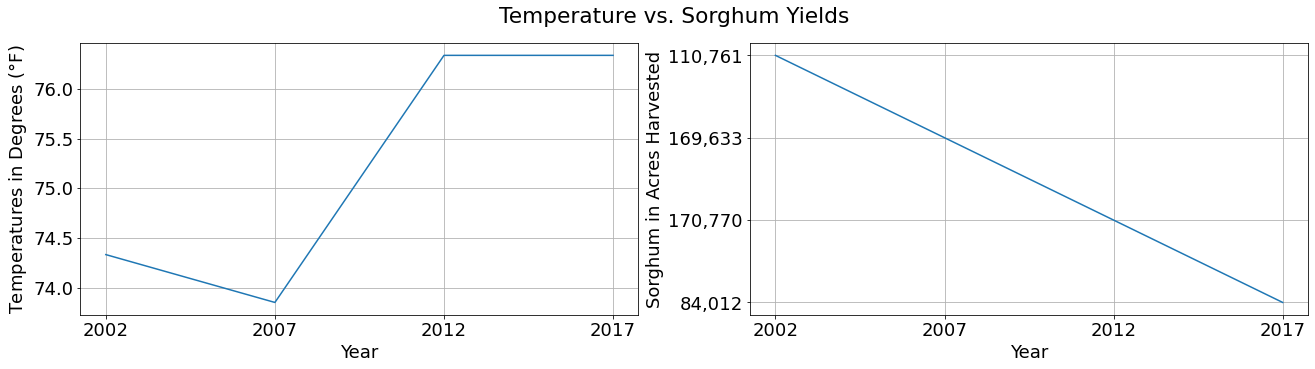

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Temperature vs. Sorghum Yields')
ax1.plot(labels,yearlytemp['temp'])
ax1.set(xlabel="Year", ylabel="Temperatures in Degrees ($\degree$F)")
ax1.grid(True)
ax2.plot(sorg.Year, sorg.Value)
ax2.set(xlabel="Year", ylabel="Sorghum in Acres Harvested")
plt.xticks(yearlytemp['year'],labels)
ax2.grid(True)
plt.gca().invert_yaxis()

In [199]:
yearlytemp['temp']

0    74.332055
0    73.850137
0    76.338904
0    76.338904
Name: temp, dtype: float64

In [ ]:
74.332055
73.850137
76.338904
76.338904
Name: temp, dtype: float64
​